In [1]:
import torch
import numpy as np

import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:

class Assign_Model(nn.Module):
    
    def __init__(self,in_size,hidden1_size,hidden2_size,out_size):
        super().__init__()
        
        self.input_l = nn.Linear(in_size,hidden1_size)
        
        self.hidden1_l = nn.Linear(hidden1_size,hidden2_size)
        
        self.hidden2_l = nn.Linear(hidden2_size,out_size)
        
    def forward(self,features):
        
        out_i = self.input_l( features )
        
        act_h1 = torch.tanh( out_i )
        
        out_h1 = self.hidden1_l( act_h1 )
        
        act_h2 = torch.tanh( out_h1 )
        
        Final_out = self.hidden2_l( act_h2 )
        
        return Final_out
    
    def hidden_out(self,features):
        
        out_i = self.input_l( features )
        
        act_h1 = torch.tanh( out_i )
        
        out_h1 = self.hidden1_l( act_h1 )
        
        act_h2 = torch.tanh( out_h1 )
        
        return act_h1, act_h2
        

# Task 2a: 2d-input Classifcation





In [3]:

train = np.genfromtxt('Data/task2a/train_t9.csv',delimiter = ',')[1:,1:]
np.random.shuffle(train)

test = np.genfromtxt('Data/task2a/test_t9.csv',delimiter = ',')[1:,1:]
# np.random.shuffle(test)

val = np.genfromtxt('Data/task2a/dev_t9.csv',delimiter = ',')[1:,1:]
np.random.shuffle(val)

print(len(train))
print(len(val))
print(len(test))

train = torch.from_numpy(train).float()
test  = torch.from_numpy(test).float()
val   = torch.from_numpy(val).float()




1200
100
200


### 2d-input classification

In [6]:
Class_Model = Assign_Model(2,20,20,3)
# torch.save(Class_Model.state_dict(), 'Task2a_Initial.pth')
# Class_Model.load_state_dict(torch.load('Task2a_Initial.pth'))
Delta_w = []
for param in Class_Model.parameters():
    Delta_w.append(torch.zeros(param.size()))

loss_fn = F.cross_entropy


lr = 1e-4

al = 0.9

val_min_loss = 100
count_min_change = 0

In [7]:
Average_loss = []
num_epochs = 3000
for epoch in range(num_epochs):
    
    
    Total_loss_Train = 0
    for X in train:
        preds = Class_Model(X[:2])
        preds = torch.unsqueeze(preds,0)
        loss = loss_fn(preds,torch.unsqueeze(X[2],0).long())
        
        Total_loss_Train += loss.item()
        loss.backward()
        
        with torch.no_grad():
            
             i = 0
             for param in Class_Model.parameters():
                
                 Delta_w[i] =  - (lr*param.grad) + (al*Delta_w[i])
                
                 param += (Delta_w[i])
                
                 param.grad.zero_()
                
                 i += 1
    Average_loss.append(Total_loss_Train/len(train))      
    
    Total_loss = 0
    with torch.no_grad():
        for X in val:
            preds = Class_Model(X[:2])
            preds = torch.unsqueeze(preds,0)
            loss = loss_fn(preds,torch.unsqueeze(X[2],0).long())
            
            Total_loss += loss.item()
            
    if epoch == 1 or epoch == 2 or epoch == 10 or epoch == 50:
        torch.save(Class_Model.state_dict(), 'Task2a_epoch{}.pth'.format(epoch))

    if val_min_loss <= Total_loss:
        count_min_change += 1
    else:
        val_min_loss = Total_loss
        count_min_change = 0
      
    if epoch >=100 and count_min_change == 50 :
        break
    
    if (epoch+1) % 10 == 0 and epoch != 9 and Average_loss[-10] - Average_loss[-1] < 0.00001:
        break
        
    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Average_Loss_Train: {:.4f}, Average_Loss_Val: {:.4f}'.format(epoch+1,num_epochs, Total_loss_Train/len(train),Total_loss/len(val)))

Epoch [100/3000], Average_Loss_Train: 0.0504, Average_Loss_Val: 0.0554
Epoch [200/3000], Average_Loss_Train: 0.0147, Average_Loss_Val: 0.0177
Epoch [300/3000], Average_Loss_Train: 0.0078, Average_Loss_Val: 0.0102
Epoch [400/3000], Average_Loss_Train: 0.0051, Average_Loss_Val: 0.0071
Epoch [500/3000], Average_Loss_Train: 0.0037, Average_Loss_Val: 0.0055
Epoch [600/3000], Average_Loss_Train: 0.0029, Average_Loss_Val: 0.0045
Epoch [700/3000], Average_Loss_Train: 0.0023, Average_Loss_Val: 0.0038
Epoch [800/3000], Average_Loss_Train: 0.0019, Average_Loss_Val: 0.0033
Epoch [900/3000], Average_Loss_Train: 0.0016, Average_Loss_Val: 0.0029
Epoch [1000/3000], Average_Loss_Train: 0.0014, Average_Loss_Val: 0.0026
Epoch [1100/3000], Average_Loss_Train: 0.0012, Average_Loss_Val: 0.0024
Epoch [1200/3000], Average_Loss_Train: 0.0011, Average_Loss_Val: 0.0022


In [7]:
Class_Model1 = Assign_Model(2,20,20,3)
Class_Model2 = Assign_Model(2,20,20,3)
Class_Model10 = Assign_Model(2,20,20,3)
Class_Model50 = Assign_Model(2,20,20,3)

Class_Model1.load_state_dict(torch.load('Task2a_epoch1.pth'))
Class_Model2.load_state_dict(torch.load('Task2a_epoch2.pth'))
Class_Model10.load_state_dict(torch.load('Task2a_epoch10.pth'))
Class_Model50.load_state_dict(torch.load('Task2a_epoch50.pth'))
# torch.save(Class_Model.state_dict(), 'Task2a_epoch_Final.pth'.format(epoch))
Class_Model.load_state_dict(torch.load('Task2a_epoch_Final.pth'))

<All keys matched successfully>

In [10]:
Z = []

x1,x2 = np.meshgrid(np.arange(-3,3,0.05) , np.arange(-3,3,0.05))
X1 = x1.reshape(-1,1)
X2 = x2.reshape(-1,1)

inp = np.append(X1,X2,1)
inp = torch.from_numpy(inp).float()

z = Class_Model1.hidden_out(inp)[0][:,0:10].detach().numpy().reshape((x1.shape[0],x1.shape[1],10))
print(z.shape)
Z.append(z)

z = Class_Model2.hidden_out(inp)[0][:,0:10].detach().numpy().reshape((x1.shape[0],x1.shape[1],10))
Z.append(z)

z = Class_Model10.hidden_out(inp)[0][:,0:10].detach().numpy().reshape((x1.shape[0],x1.shape[1],10))
Z.append(z)

z = Class_Model50.hidden_out(inp)[0][:,0:10].detach().numpy().reshape((x1.shape[0],x1.shape[1],10))
Z.append(z)

z = Class_Model.hidden_out(inp)[0][:,0:10].detach().numpy().reshape((x1.shape[0],x1.shape[1],10))
Z.append(z)

z = Class_Model1.hidden_out(inp)[1][:,0:10].detach().numpy().reshape((x1.shape[0],x1.shape[1],10))
Z.append(z)

z = Class_Model2.hidden_out(inp)[1][:,0:10].detach().numpy().reshape((x1.shape[0],x1.shape[1],10))
Z.append(z)

z = Class_Model10.hidden_out(inp)[1][:,0:10].detach().numpy().reshape((x1.shape[0],x1.shape[1],10))
Z.append(z)

z = Class_Model50.hidden_out(inp)[1][:,0:10].detach().numpy().reshape((x1.shape[0],x1.shape[1],10))
Z.append(z)

z = Class_Model.hidden_out(inp)[1][:,0:10].detach().numpy().reshape((x1.shape[0],x1.shape[1],10))
Z.append(z)

z = F.softmax(Class_Model1(inp),dim = 1).detach().numpy().reshape((x1.shape[0],x1.shape[1],3))
Z.append(z)

z = F.softmax(Class_Model2(inp),dim = 1).detach().numpy().reshape((x1.shape[0],x1.shape[1],3))
Z.append(z)

z = F.softmax(Class_Model10(inp),dim = 1).detach().numpy().reshape((x1.shape[0],x1.shape[1],3))
Z.append(z)

z = F.softmax(Class_Model50(inp),dim = 1).detach().numpy().reshape((x1.shape[0],x1.shape[1],3))
Z.append(z)

z = F.softmax(Class_Model(inp),dim = 1).detach().numpy().reshape((x1.shape[0],x1.shape[1],3))
Z.append(z)

print()

(120, 120, 10)



In [11]:
epoch_map = [1,2,10,50,'Final']


def Plot(i,ii,jj,i1,s):
    ax = fig.add_subplot(gs[ii, jj],projection = '3d')
    ax.plot_surface(x2, x1,Z[i][:,:,i1],rstride=1, cstride=1,cmap='viridis', edgecolor='none')
#     ax.plot_surface(x2, x1,Z[i][:,:,1],rstride=1, cstride=1,cmap='viridis', edgecolor='none')
    ax.set_title('{} output after epoch {}'.format(s,epoch_map[i%5]),fontsize=15)
    ax.set_xlabel('x2',fontsize=15)
    ax.set_ylabel('x1',fontsize=15)
    ax.set_zlabel('y',fontsize=15)
    
#     ax.view_init(0, 0)

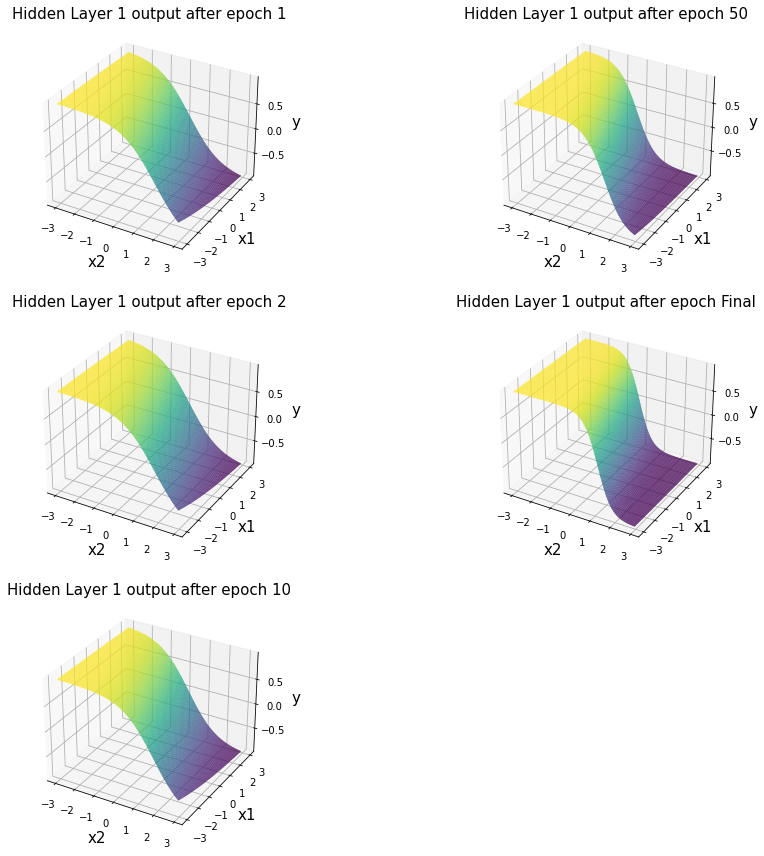

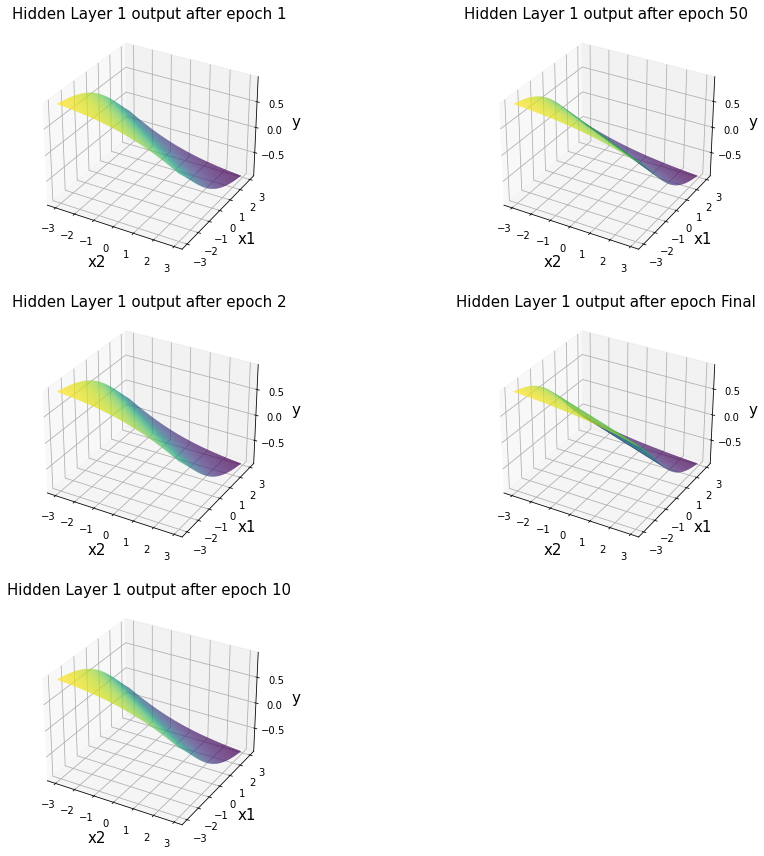

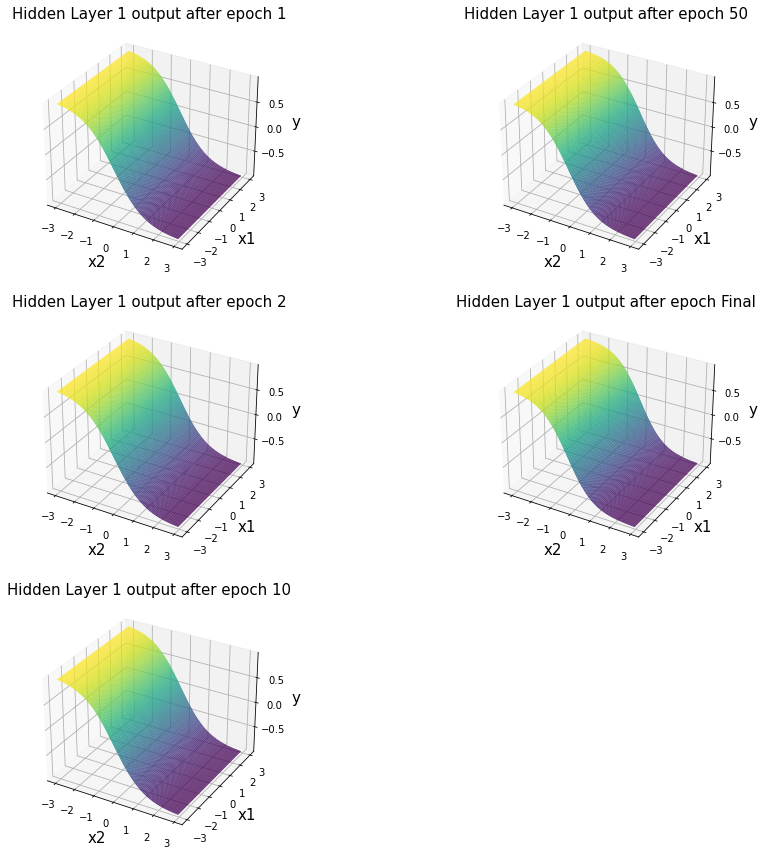

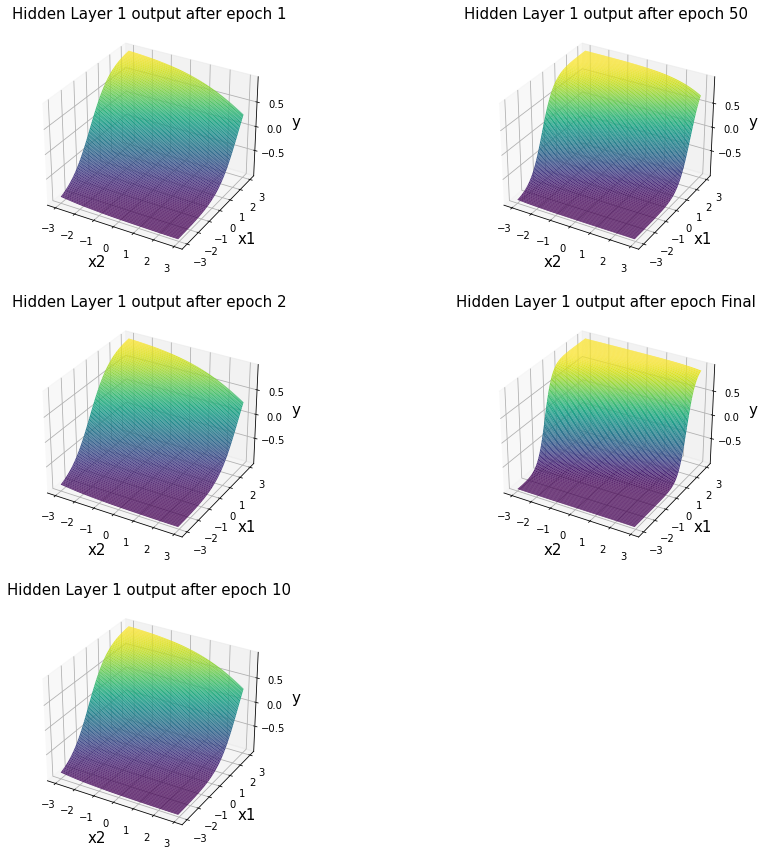

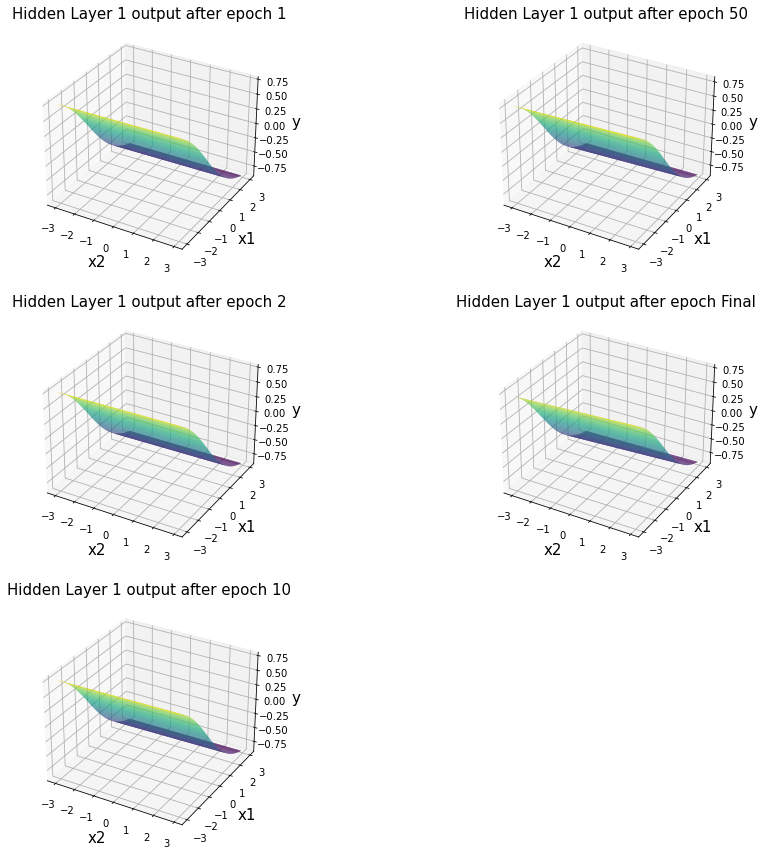

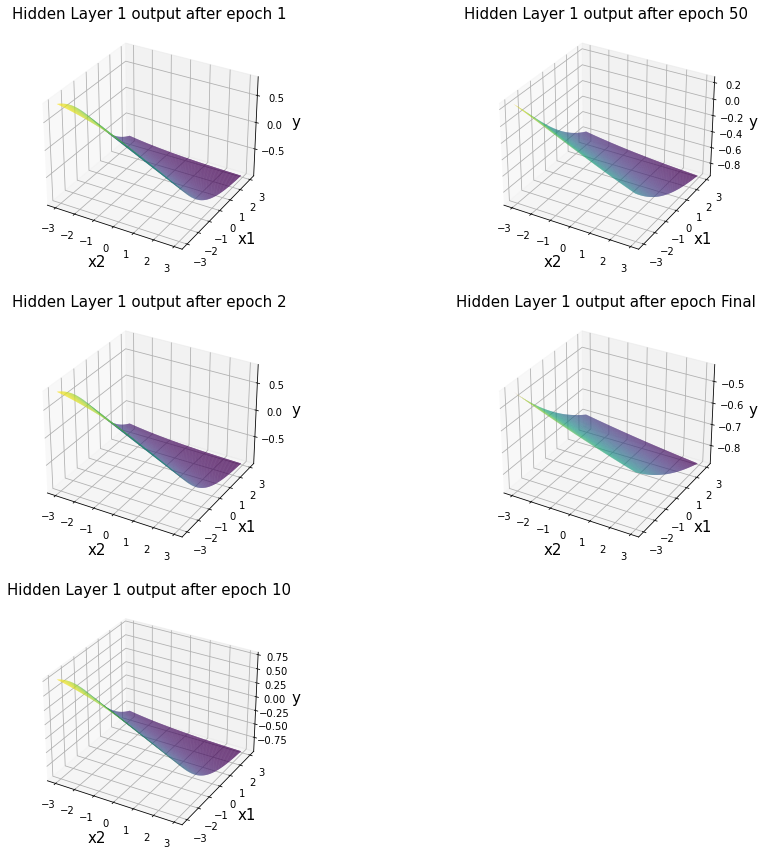

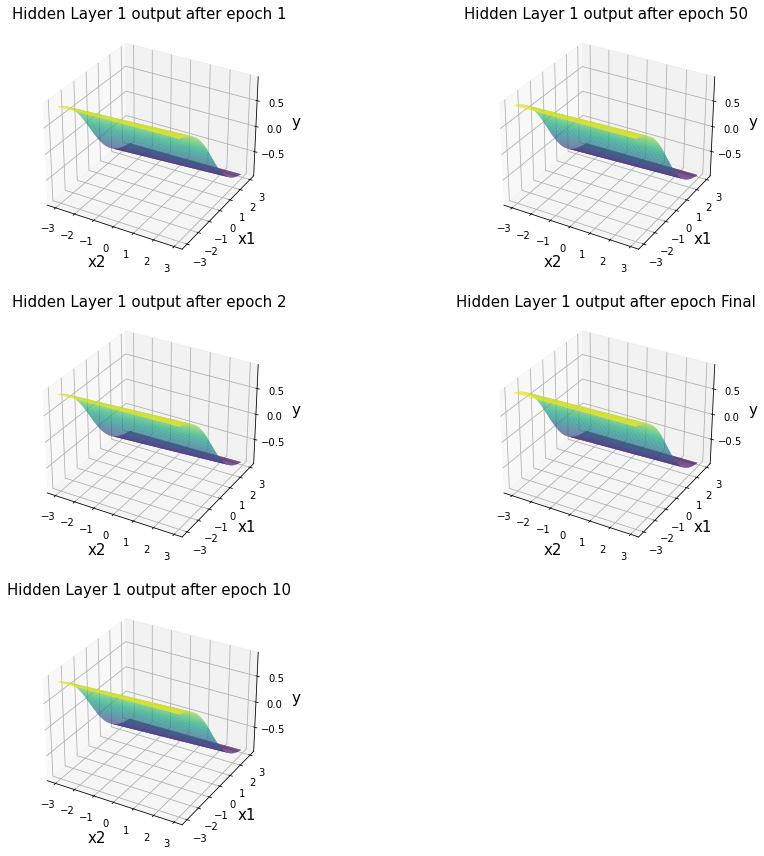

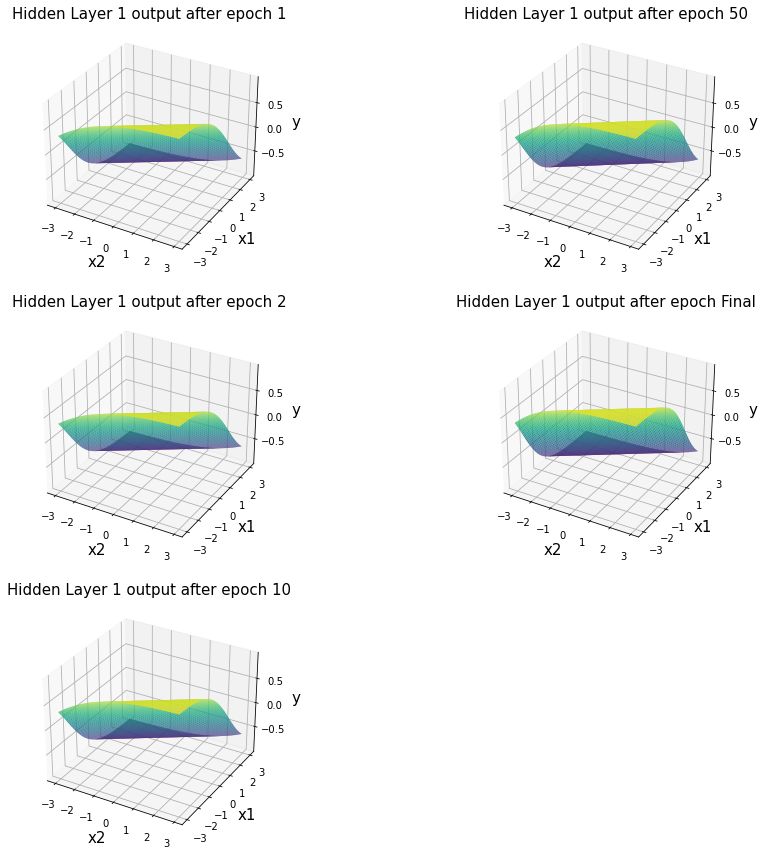

<Figure size 1080x1080 with 0 Axes>

In [21]:
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(nrows=3, ncols=2)

for i in range(8):

    Plot(0,0,0,i,'Hidden Layer 1')
    Plot(1,1,0,i,'Hidden Layer 1')
    Plot(2,2,0,i,'Hidden Layer 1')
    Plot(3,0,1,i,'Hidden Layer 1')
    Plot(4,1,1,i,'Hidden Layer 1')
    
    fig.savefig('PICS/2.1.{}.png'.format(i+1))
    fig = plt.figure(figsize=(15, 15))

# ax = plt.axes(projection='3d')
# ax.plot_surface(x1, x2, Z[0], rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
# ax.set_title('surface');

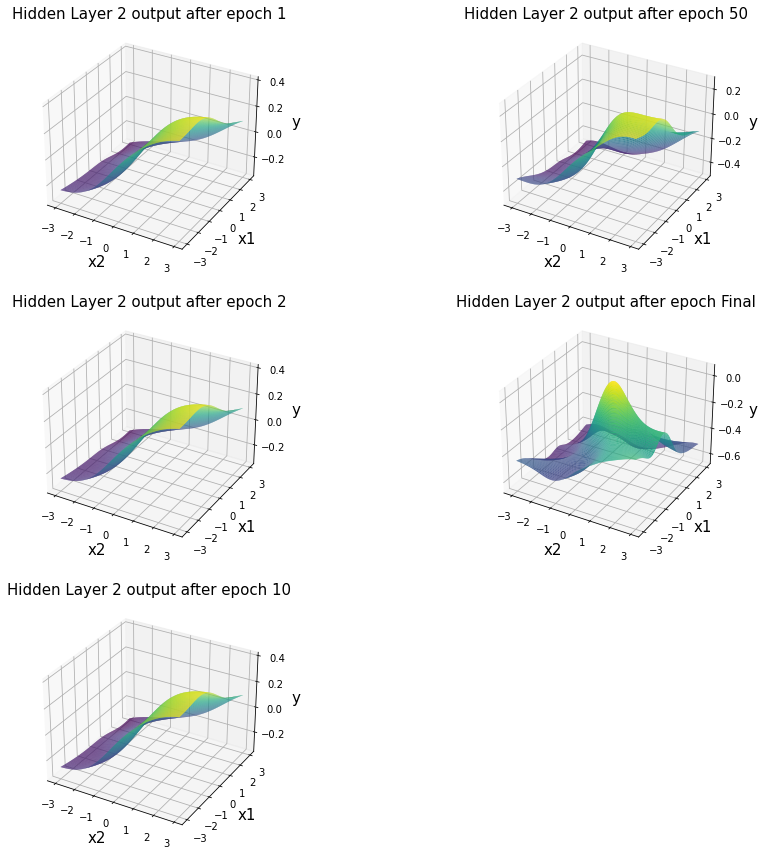

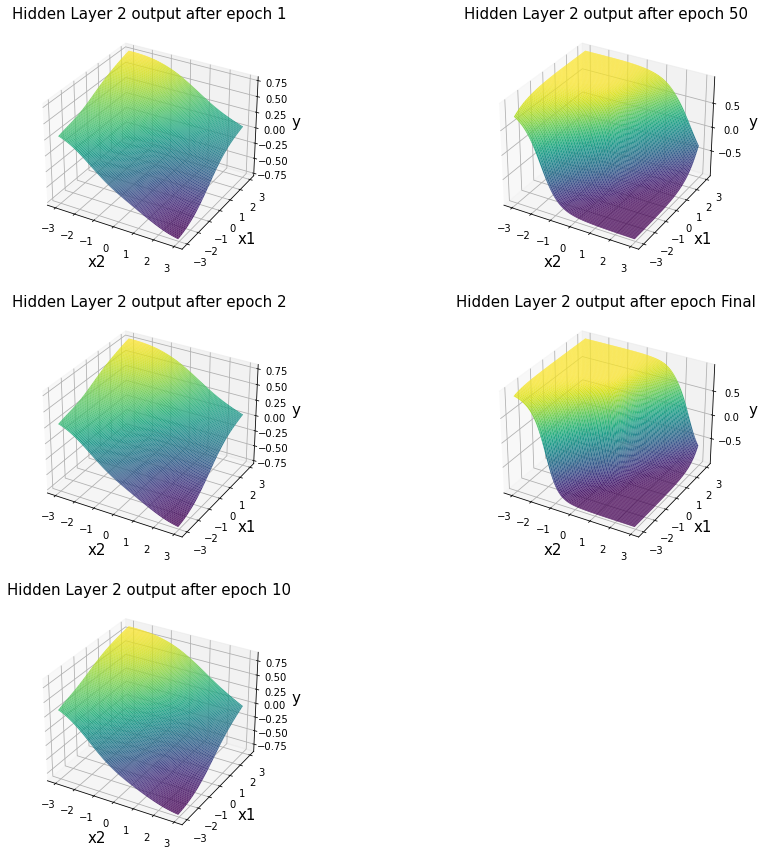

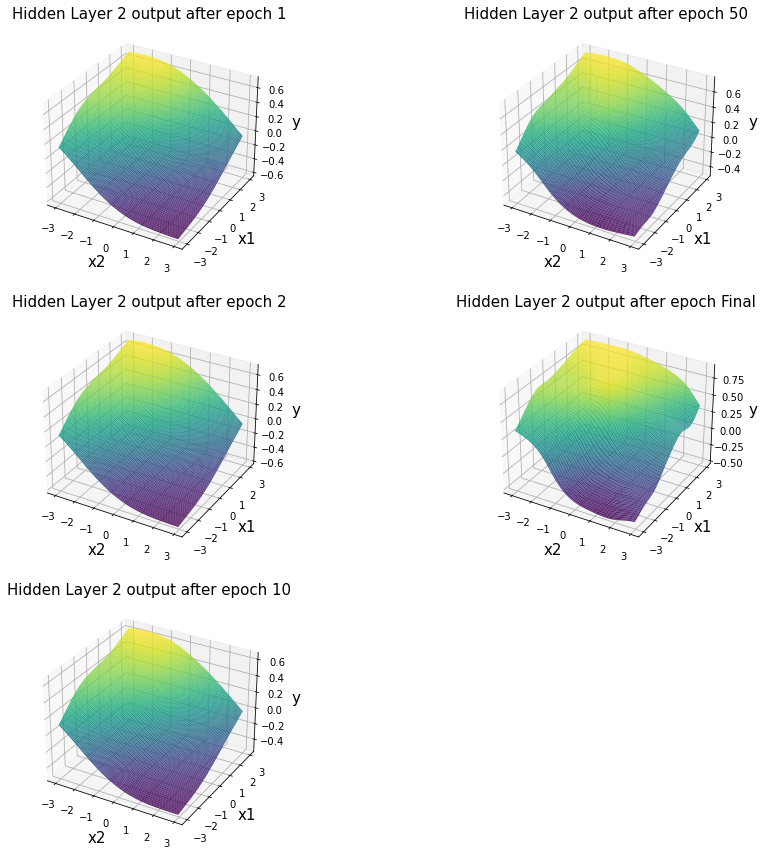

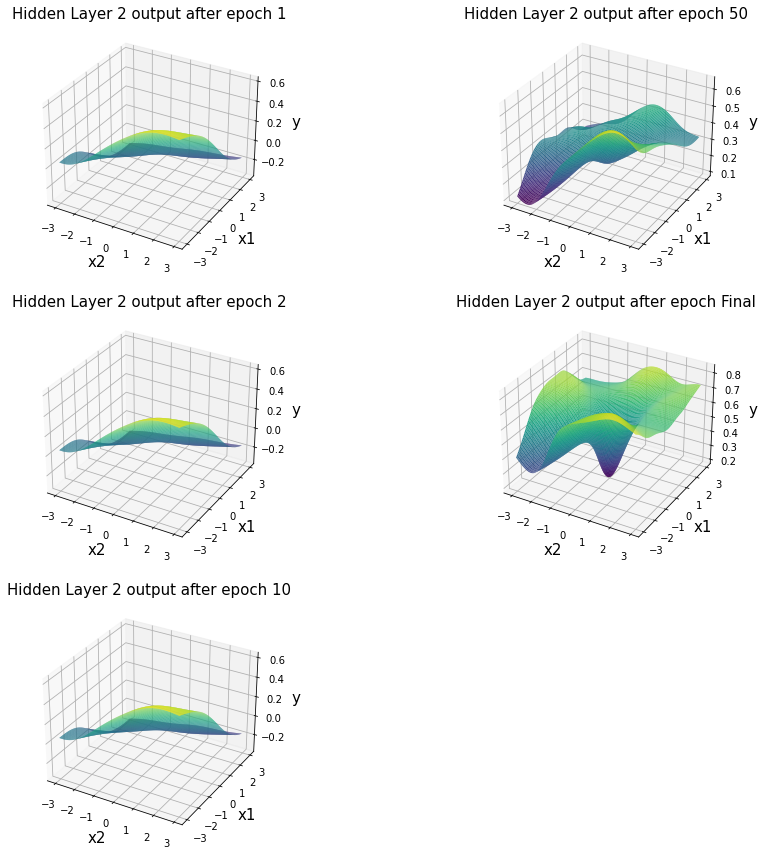

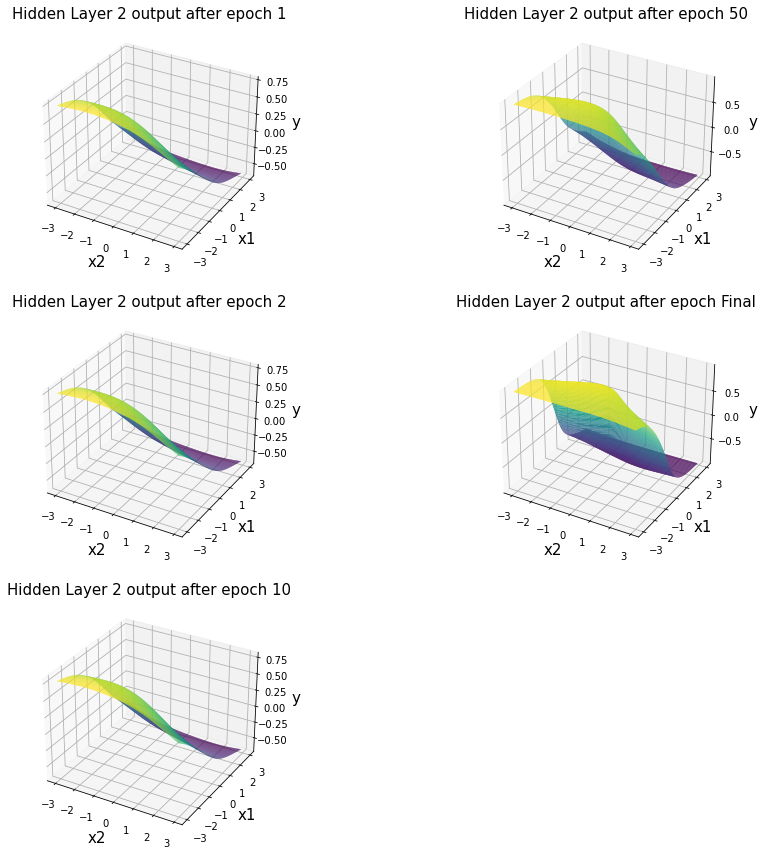

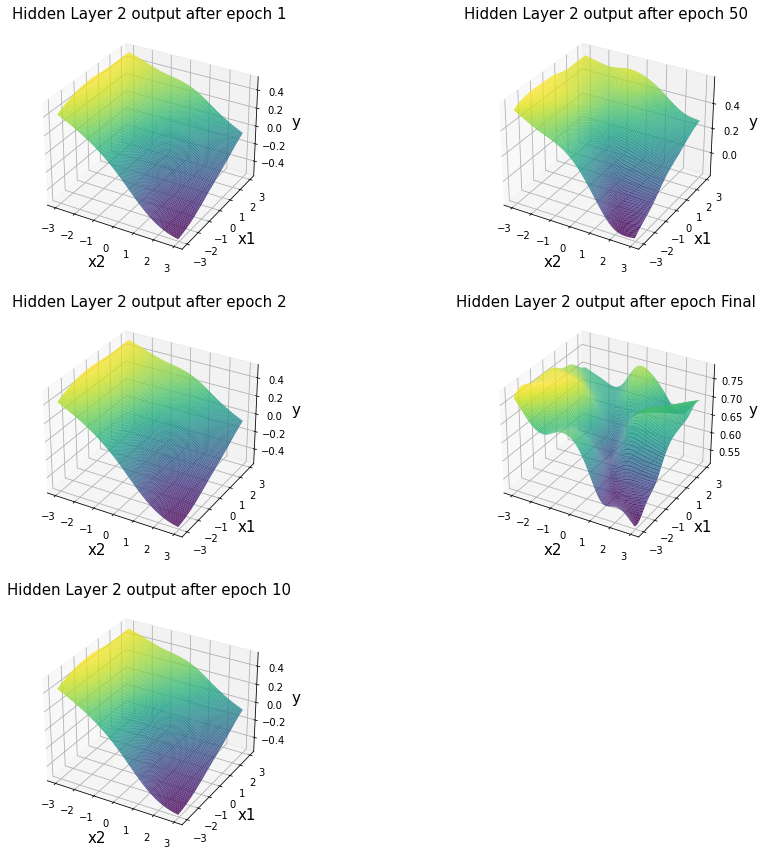

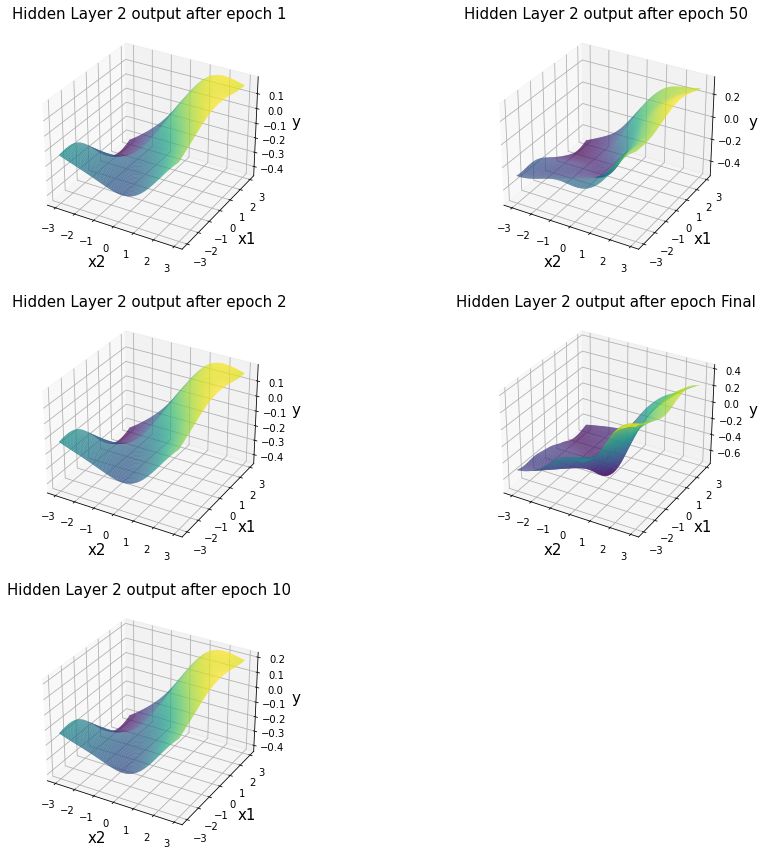

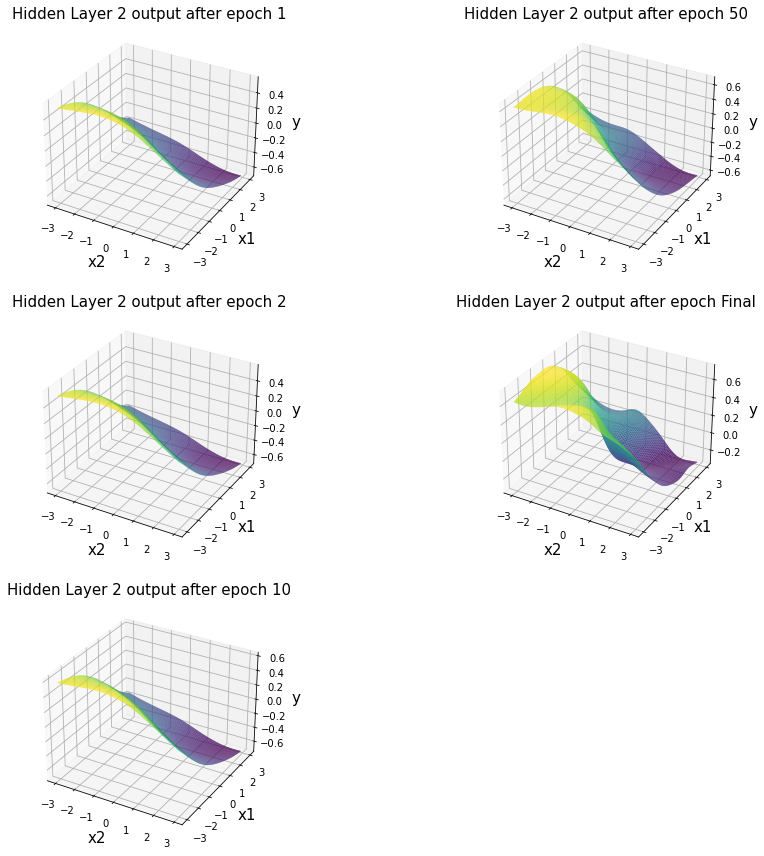

<Figure size 1080x1080 with 0 Axes>

In [22]:
plt.ioff()
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(nrows=3, ncols=2)

for i in range(8):

    Plot(5,0,0,i,'Hidden Layer 2')
    Plot(6,1,0,i,'Hidden Layer 2')
    Plot(7,2,0,i,'Hidden Layer 2')
    Plot(8,0,1,i,'Hidden Layer 2')
    Plot(9,1,1,i,'Hidden Layer 2')

    fig.savefig('PICS/2.1.{}.png'.format(i+9))
    fig = plt.figure(figsize=(15, 15))

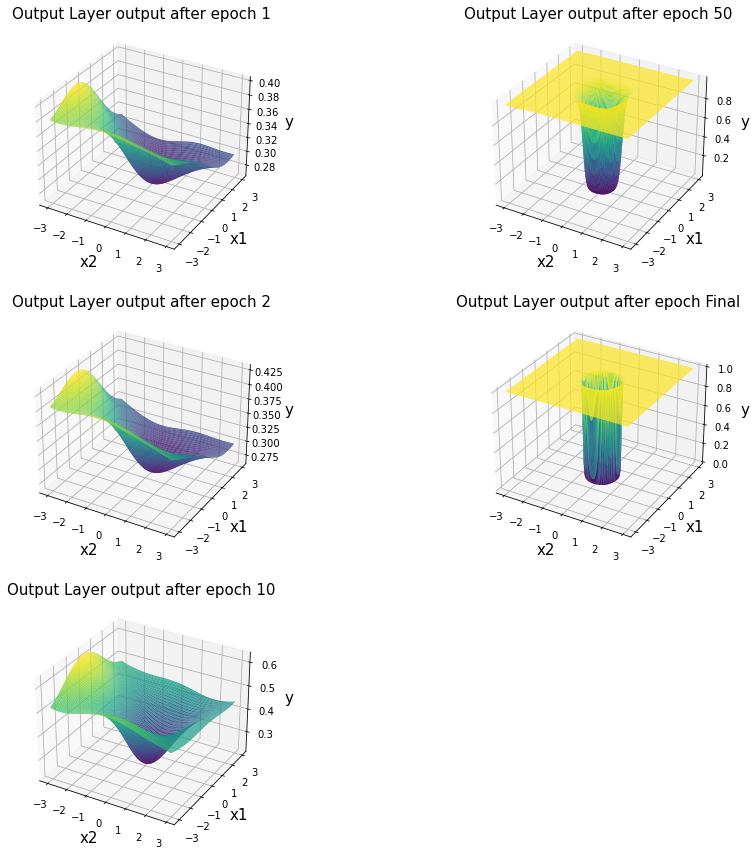

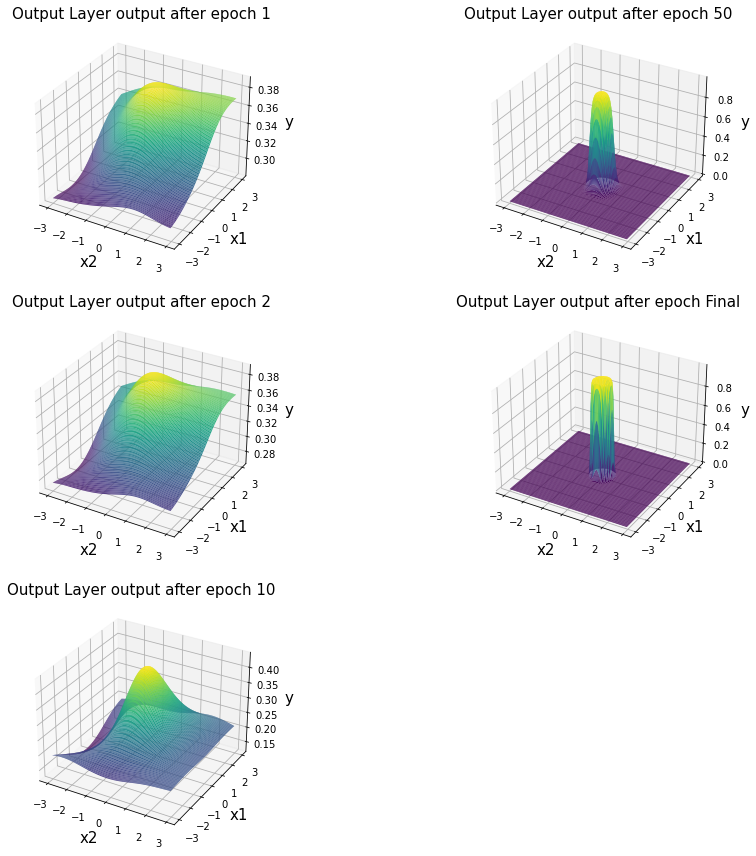

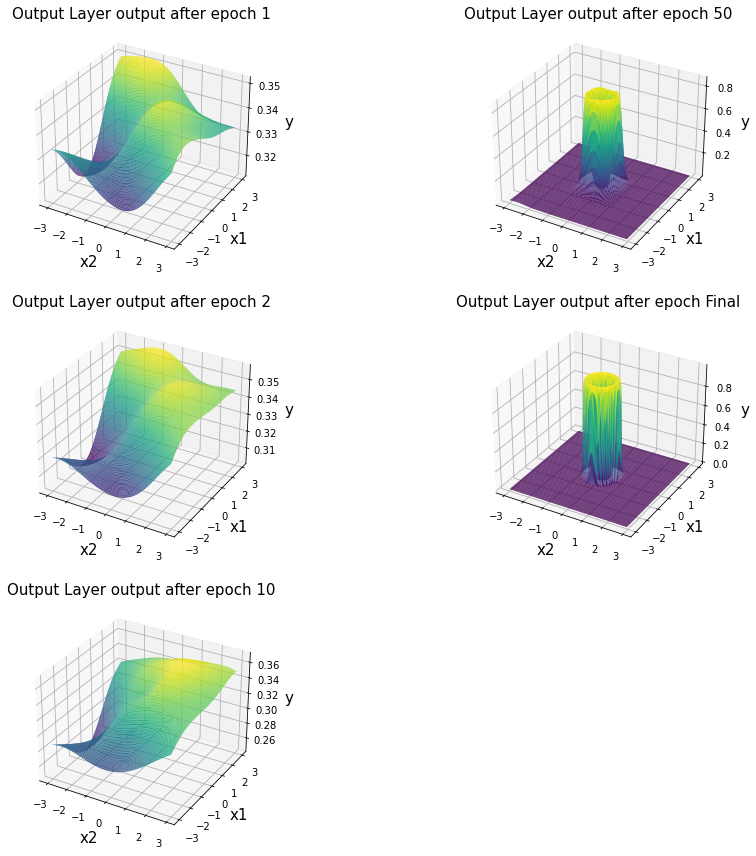

<Figure size 1080x1080 with 0 Axes>

In [12]:
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(nrows=3, ncols=2)
for i in range(3):
    Plot(10,0,0,i,'Output Layer')
    Plot(11,1,0,i,'Output Layer')
    Plot(12,2,0,i,'Output Layer')
    Plot(13,0,1,i,'Output Layer')
    Plot(14,1,1,i,'Output Layer')
    plt.ioff()
    fig.savefig('PICS/2.1.{}.png'.format(i+17))
    fig = plt.figure(figsize=(15, 15))

In [26]:
x1,x2 = np.meshgrid(np.arange(-1.1,1.1,0.01) , np.arange(-1.1,1.1,0.01))
X1 = x1.reshape(-1,1)
X2 = x2.reshape(-1,1)

In [27]:
inp = np.append(X1,X2,1)
inp = torch.from_numpy(inp).float()

In [28]:
preds = Class_Model(inp)
preds = torch.argmax(preds,1).numpy()
preds = preds.reshape(x1.shape)

Text(0.5, 1.0, 'Decision Region Plot')

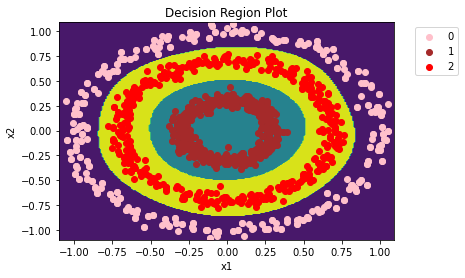

In [29]:
plt.contourf(x1,x2,preds)
plt.scatter(train[train[:,2] == 0][:,0],train[train[:,2] == 0][:,1],c = 'pink',label = 0 )
plt.scatter(train[train[:,2] == 1][:,0],train[train[:,2] == 1][:,1],c = 'brown',label = 1)
plt.scatter(train[train[:,2] == 2][:,0],train[train[:,2] == 2][:,1],c = 'red',label = 2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Region Plot')

In [18]:
preds = Class_Model(test)
preds = torch.argmax(preds,1).detach().numpy()

In [19]:
np.savetxt("Predictions.csv", preds, delimiter=",")

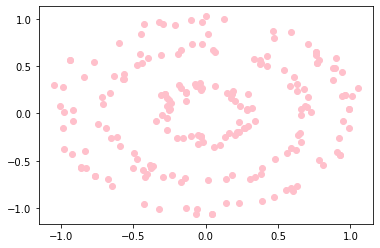

In [8]:
plt.scatter(test[:,0],test[:,1],c = 'pink',label = 0 )